In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
#Logic
#Just do one - translate the entire skeleton with point 8 at (0.5,.05) - (xc,yc)
#Get the coordinates/vector.
#Determine the translation: x+/-xd, y+/-yd?
#Check for point 8: 
#Calculate the distance between point 8's x (x8) and 0.5 (xdistance = x8-0.5)
#if x8 was larger than 0.5 (positive xdistance result):
#it means the translation will require us to minus the xd (xdistance) from all coordinates.
#if x8 was smaller than 0.5 (negative xdistance result):
#it means the translation will require us to plus the xd (xdistance) to all coordinates/
#Calculate the distance between point 8's y (y8) and 0.5 (ydistance = y8-0.5)
#if y8 was larger than 0.5 (positive ydistance result):
#it means the translation will require us to minus the yd (ydistance) from all coordinates.
#if y8 was smaller than 0.5 (negative ydistance result):
#it means the translation will require us to add the yd (ydistance) to all coordinates
#NOTE: 870 samples - Dancer 24 excluded.

[0.629939, 0.607424, 0.591083, 0.550194, 0.513518, 0.625752, 0.678928, 0.742166, 0.550275, 0.552288, 0.5462279999999999, 0.5542889999999999, 0.554287, 0.450107, 0.366384, 0.627726, 0, 0.607359, 0, 0.325577, 0.33363899999999996, 0.35009399999999996, 0.580965, 0.5767669999999999, 0.548273]
Point 8: 0.550275
[0.352578, 0.417869, 0.407139, 0.423351, 0.420676, 0.420668, 0.412474, 0.382669, 0.5323100000000001, 0.535041, 0.682167, 0.8020959999999999, 0.529624, 0.5187269999999999, 0.516079, 0.339051, 0, 0.35254199999999997, 0, 0.510663, 0.518752, 0.513427, 0.813033, 0.818384, 0.818391]
[0.892814, 0.8373809999999999, 0.823098, 0.8667239999999999, 0.894381, 0.8091929999999999, 0.7940800000000001, 0.8887419999999999, 0.6499119999999999, 0.607399, 0.675133, 0.701661, 0.466601, 0.454518, 0.47866499999999995, 0.9179700000000001, 0, 0.844579, 0, 0.30574799999999996, 0.327499, 0.410191, 0.6843629999999999, 0.713486, 0.773293]
x for point 8:  0.550275
y for point 8:  0.5323100000000001
xdist positive x

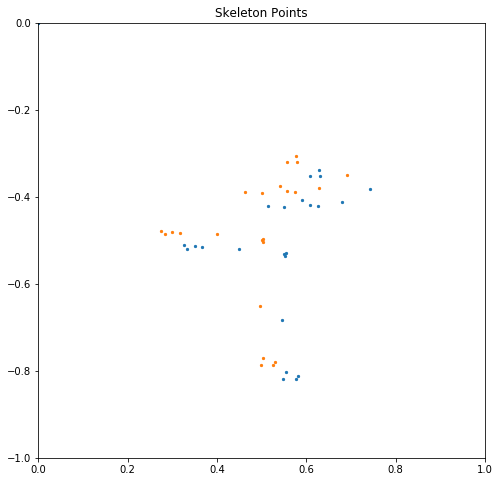

In [5]:
#Section of code to test the translation to centre-point 0,5
DIR = "D:/openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended/openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\DatasetPosePerDancer/Arabesque/Dancer1/09-14-45_1_snapshot_keypoints.json"
img_json = pd.read_json(DIR)
keypoints = img_json.people[0]['pose_keypoints_2d']
#print(keypoints)

xorig = keypoints[0::3]
yorig = keypoints[1::3]
corig = keypoints[2::3]

print(xorig)
print("Point 8:", xorig[8])
print(yorig)
print(corig)

yplot = [-y for y in yorig]

fig, ax = plt.subplots(1, figsize=(8,8))
plt.title('Skeleton Points')
plt.xlim(0, 1)
plt.ylim(-1, 0)

sc = ax.scatter(xorig,yplot, s=5)

#get point 8's coordinate
print("x for point 8: ", xorig[8])
print("y for point 8: ", yorig[8])

#Calculate the distances to determine the translation:
xdistance = xorig[8] - 0.5
ydistance = yorig[8] - 0.5

xNew=[]
yNew=[]

if(xdistance >= 0):
    #translate left: loop through all coordinates and deduct the xdistance from their values
    xNew = [(x - xdistance) for x in xorig]
    print("xdist positive x[8]: ",xNew[8])
if(xdistance < 0):
    #translate right: loop through all coordinates and add the xdistance to their values
    xNew = [(x + xdistance) for x in xorig]
    print("xdist negative x[8]: ",xNew[8])
if(ydistance >= 0):
    #tanslate down: loop through all coordinates and deduct the ydistance from their values
    yNew = [(y - ydistance) for y in yorig]
    print("ydist positive y[8]: ",yNew[8])
if(ydistance < 0):
    #Translate up: loop throuhg all coordinates and add the ydistance to their values
    yNew = [(y +ydistance) for y in yorig]
    print("ydist negative y[8]: ", yNew[8])
    #redraw the new skeleton

plotyNew = [-y for y in yNew]
#fig, ax = plt.subplots(1, figsize=(8,8))
#plt.title('Translated Skeleton Points')
#plt.xlim(0, 1)
#plt.ylim(-1, 0)

ax.scatter(xNew,plotyNew, s=5)

In [15]:
#Now need to loop through all dancers' skeleton data and translate the data and save it.

ARABESQUE_DIR = "D:/openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended/openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\DatasetPosePerDancer/Arabesque"

#Run through each dancer folder and translate the coordinates and save the data
BigX = []
arabesqueX =[]
arabesqueY =[]
arabesqueC =[]
xdistances =[]
ydistances =[]
xorigforchecking =[]
yorigforchecking =[]
dancerNum = 0
def createNewCenteredCoordinates():
    global dancerNum
    for subdir, dirs, files in os.walk(ARABESQUE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(ARABESQUE_DIR,subdir,file)
                img_json = pd.read_json(file_path)
                img_keypoints = img_json.people[0]['pose_keypoints_2d']
                xorig = img_keypoints[0::3]
                xorigforchecking.append(xorig)
                yorig = img_keypoints[1::3]
                yorigforchecking.append(yorig)
                corig = img_keypoints[2::3]
                
                xdistance = xorig[8] - 0.5
                xdistances.append(xdistance)
                ydistance = yorig[8] - 0.5
                ydistances.append(ydistance)
                xNew = []
                yNew =[]
                
                if(xdistance >= 0):
                    #translate left: loop through all coordinates and deduct the xdistance from their values
                    xNew = [(x - xdistance) for x in xorig]
                    #logic for the outliers to ensure if there was a zero point in the original data - it remains a zero for the new data
                    for i in range(len(xNew)):
                        if xorig[i]==0:
                            xNew[i] = 0
                    #print("xdist positive x[8]: ",xNew[8])
                if(xdistance < 0):
                    #translate right: loop through all coordinates and add the xdistance to their values
                    xNew = [(x + abs(xdistance)) for x in xorig]
                    for i in range(len(xNew)):
                        if xorig[i]==0:
                            xNew[i] = 0
                    #print("xdist negative x[8]: ",xNew[8])
                if(ydistance >= 0):
                    #tanslate down: loop through all coordinates and deduct the ydistance from their values
                    yNew = [(y - ydistance) for y in yorig]
                    for i in range(len(yNew)):
                        if yorig[i]==0:
                            yNew[i] = 0
                    #print("ydist positive y[8]: ",yNew[8])
                if(ydistance < 0):
                    #Translate up: loop throuhg all coordinates and add the ydistance to their values
                    yNew = [(y + abs(ydistance)) for y in yorig]
                    for i in range(len(yNew)):
                        if yorig[i]==0:
                            yNew[i] = 0
                    #print("ydist negative y[8]: ", yNew[8])
                    #redraw the new skeleton
                arabesqueX.append(xNew)
                arabesqueY.append(yNew)
                arabesqueC.append(corig)
                #Figure out the format for your X [x,y,c]
                sampleArr = [xNew,yNew,corig]
                interlaced = [val for tup in zip(*sampleArr) for val in tup]
                BigX.append(interlaced)
                
createNewCenteredCoordinates() 



print("XOriginal: ",xorigforchecking[0])
print("XNew: ", arabesqueX[0])
print("All x for this skeleton 1 values got translated by this much: ",xdistances[0])

print("YOriginal",yorigforchecking[0])
print("YNew:", arabesqueY[0])
print("All y values for this skeleton 1 got translated by this much:", ydistances[0])
#For the features that spit out 0: remain zero - measure put in place.

print("Confidence Score:",arabesqueC[0])

print("BigX length: ", len(BigX))

#save this BigX Arabesque:
np.save('BigArabesqueX',BigX)
loaded = np.load('BigArabesqueX.npy')
print("Loaded:",loaded[0])


XOriginal:  [0.629939, 0.607424, 0.591083, 0.550194, 0.513518, 0.625752, 0.678928, 0.742166, 0.550275, 0.552288, 0.5462279999999999, 0.5542889999999999, 0.554287, 0.450107, 0.366384, 0.627726, 0, 0.607359, 0, 0.325577, 0.33363899999999996, 0.35009399999999996, 0.580965, 0.5767669999999999, 0.548273]
XNew:  [0.5796640000000001, 0.557149, 0.5408080000000001, 0.499919, 0.46324300000000007, 0.575477, 0.628653, 0.691891, 0.5, 0.502013, 0.495953, 0.504014, 0.504012, 0.399832, 0.31610900000000003, 0.577451, 0, 0.557084, 0, 0.27530200000000005, 0.283364, 0.299819, 0.53069, 0.526492, 0.49799800000000005]
All x for this skeleton 1 values got translated by this much:  0.05027499999999996
YOriginal [0.352578, 0.417869, 0.407139, 0.423351, 0.420676, 0.420668, 0.412474, 0.382669, 0.5323100000000001, 0.535041, 0.682167, 0.8020959999999999, 0.529624, 0.5187269999999999, 0.516079, 0.339051, 0, 0.35254199999999997, 0, 0.510663, 0.518752, 0.513427, 0.813033, 0.818384, 0.818391]
YNew: [0.32026799999999994

In [3]:
#Generalized code for saving translated data for each Pose. Done for every pose
poseName = "Demi-Plie"
DIR = "D:/openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended/openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\DatasetPosePerDancer/"+poseName

#Run through each dancer folder and translate the coordinates and save the data
BigX = []
poseX =[]
poseY =[]
poseC =[]
xdistances =[]
ydistances =[]
xorigforchecking =[]
yorigforchecking =[]
dancerNum = 0
def createNewCenteredCoordinates():
    global dancerNum
    for subdir, dirs, files in os.walk(DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(DIR,subdir,file)
                img_json = pd.read_json(file_path)
                img_keypoints = img_json.people[0]['pose_keypoints_2d']
                xorig = img_keypoints[0::3]
                xorigforchecking.append(xorig)
                yorig = img_keypoints[1::3]
                yorigforchecking.append(yorig)
                corig = img_keypoints[2::3]
                
                xdistance = xorig[8] - 0.5
                xdistances.append(xdistance)
                ydistance = yorig[8] - 0.5
                ydistances.append(ydistance)
                xNew = []
                yNew =[]
                
                if(xdistance >= 0):
                    #translate left: loop through all coordinates and deduct the xdistance from their values
                    xNew = [(x - xdistance) for x in xorig]
                    #logic for the outliers to ensure if there was a zero point in the original data - it remains a zero for the new data
                    for i in range(len(xNew)):
                        if xorig[i]==0:
                            xNew[i] = 0
                    #print("xdist positive x[8]: ",xNew[8])
                if(xdistance < 0):
                    #translate right: loop through all coordinates and add the xdistance to their values
                    xNew = [(x + abs(xdistance)) for x in xorig]
                    for i in range(len(xNew)):
                        if xorig[i]==0:
                            xNew[i] = 0
                    #print("xdist negative x[8]: ",xNew[8])
                if(ydistance >= 0):
                    #tanslate down: loop through all coordinates and deduct the ydistance from their values
                    yNew = [(y - ydistance) for y in yorig]
                    for i in range(len(yNew)):
                        if yorig[i]==0:
                            yNew[i] = 0
                    #print("ydist positive y[8]: ",yNew[8])
                if(ydistance < 0):
                    #Translate up: loop throuhg all coordinates and add the ydistance to their values
                    yNew = [(y + abs(ydistance)) for y in yorig]
                    for i in range(len(yNew)):
                        if yorig[i]==0:
                            yNew[i] = 0
                    #print("ydist negative y[8]: ", yNew[8])
                    #redraw the new skeleton
                poseX.append(xNew)
                poseY.append(yNew)
                poseC.append(corig)
                #Figure out the format for your X [x,y,c]
                sampleArr = [xNew,yNew,corig]
                interlaced = [val for tup in zip(*sampleArr) for val in tup]
                BigX.append(interlaced)
                
createNewCenteredCoordinates() 



print("XOriginal: ",xorigforchecking[0])
print("XNew: ", poseX[0])
print("All x for this skeleton 1 values got translated by this much: ",xdistances[0])

print("YOriginal",yorigforchecking[0])
print("YNew:", poseY[0])
print("All y values for this skeleton 1 got translated by this much:", ydistances[0])
#For the features that spit out 0: remain zero - measure put in place.

print("Confidence Score:",poseC[0])

print("BigX length: ", len(BigX))

#save this BigX Arabesque:
np.save('RootCoordinates/'+poseName+'X',BigX)# this stores the positive y values (need to be made negative for drawing)
loaded = np.load('RootCoordinates/'+poseName+'X.npy')
print("Loaded:",loaded[0])


XOriginal:  [0.533876, 0.5318400000000001, 0.49712399999999995, 0.46659599999999996, 0.480703, 0.566556, 0.597177, 0.5890139999999999, 0.53186, 0.509398, 0.468568, 0.51959, 0.560358, 0.597214, 0.552261, 0.529728, 0.544128, 0.51546, 0.550248, 0.584959, 0.580952, 0.546103, 0.495006, 0.49701599999999996, 0.5297649999999999]
XNew:  [0.502016, 0.4999800000000001, 0.46526399999999996, 0.43473599999999996, 0.448843, 0.534696, 0.565317, 0.5571539999999999, 0.5, 0.477538, 0.436708, 0.48773, 0.528498, 0.565354, 0.520401, 0.497868, 0.512268, 0.48360000000000003, 0.518388, 0.553099, 0.549092, 0.514243, 0.463146, 0.46515599999999996, 0.49790499999999993]
All x for this skeleton 1 values got translated by this much:  0.03186
YOriginal [0.363431, 0.44503000000000004, 0.445069, 0.516133, 0.5841529999999999, 0.445056, 0.513398, 0.584135, 0.5923649999999999, 0.59499, 0.706711, 0.7940539999999999, 0.592339, 0.7066509999999999, 0.79676, 0.35799000000000003, 0.35802, 0.368902, 0.37162799999999996, 0.823917

In [2]:
BigList = []
x=[1,2,3]
y=[10,20,30]
c=[100,200,300]

lists = [x,y,c]
#newlist = [expression for item in iterable if condition == True]
bigX = [val for tup in zip(*lists) for val in tup]
print(bigX)
BigList.append(bigX)
print(BigList)

#Redo all heatmaps, mean skeletons etc.
#Question: Keep the confidence scores? - yes.
#Augment features: distance of points from the mean skeleton
#Look at features that also calculate the distance between specific points that are significant (thought exercise.)
#Listen to latest recording again and summarize.

[1, 10, 100, 2, 20, 200, 3, 30, 300]
[[1, 10, 100, 2, 20, 200, 3, 30, 300]]
